## Importación de las librerías 

In [1]:
import utils
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## Conjuntos de entrenamiento y test y CV controller

In [2]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [3]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Carga del mejor árbol de clasificación

Este será el árbol que se empleará para realizar el **random forest**

In [4]:
decision_tree_model = pickle.load(open('/kaggle/input/decision-tree-model/decision_tree_model.sav', 'rb'))
print(decision_tree_model.criterion)
decision_tree_model

gini


DecisionTreeClassifier(max_depth=10, min_samples_leaf=45, min_samples_split=200,
                       random_state=99)

## Búsqueda del parámetro max_features del random forest

Utilizaremos el **RandomForestClassifier** que nos permite también tunear los parámetros del árbol, aunque no lo haremos. También se puede hacer lo mismo con **BaggingClassifier** añadiendo aleatoriedad a la selección de las variables.

In [5]:
param_grid = {
    'n_estimators': list(range(50,501,50)),
    'max_features': ['sqrt', 'log2', None]
}

grid_search_cv = GridSearchCV(
    RandomForestClassifier(criterion=decision_tree_model.criterion, max_depth=decision_tree_model.max_depth,
                           min_samples_leaf=decision_tree_model.min_samples_leaf, min_samples_split=decision_tree_model.min_samples_split,
                           random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=45,
                                              min_samples_split=200,
                                              random_state=99),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='roc_auc')

Seleccionamos el **log2** o **sqrt** ya que ambos salen iguales y no queremos seleccionar todas las variables, es decir None

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

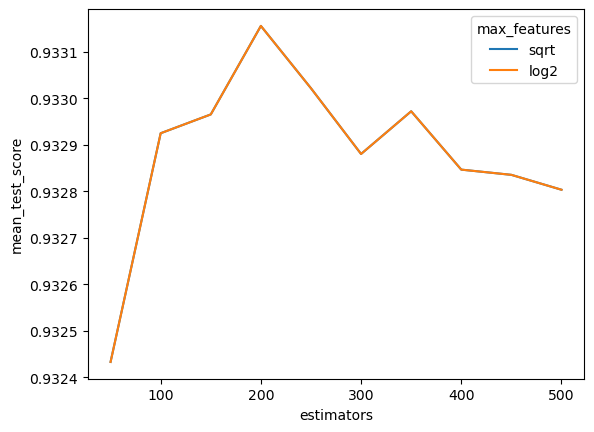

In [7]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
max_features_list = list(grid_search_cv.cv_results_['param_max_features'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
bagging_df = pd.DataFrame(list(zip(estimators_list, max_features_list, mean_test_score_list)), columns=['estimators', 'max_features', 'mean_test_score'])
sns.lineplot(data=bagging_df, x="estimators", y="mean_test_score", hue='max_features', legend="full")

## Búsqueda del parámetro max_samples del random forest

In [9]:
param_grid = {
    'n_estimators': list(range(50,201,50)),
    'max_samples': list(np.arange(0.1,1.01,0.1))
}

grid_search_cv = GridSearchCV(
    RandomForestClassifier(criterion=decision_tree_model.criterion, max_depth=decision_tree_model.max_depth, max_features='sqrt',
                           min_samples_leaf=decision_tree_model.min_samples_leaf, min_samples_split=decision_tree_model.min_samples_split,
                           random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=RandomForestClassifier(max_depth=10, max_features='sqrt',
                                              min_samples_leaf=45,
                                              min_samples_split=200,
                                              random_state=99),
             n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.2, 0.30000000000000004, 0.4,
                                         0.5, 0.6, 0.7000000000000001, 0.8, 0.9,
                                         1.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

Escogemos como max_samples 0.6, ya que apartir de alli no hay mejora significativa

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

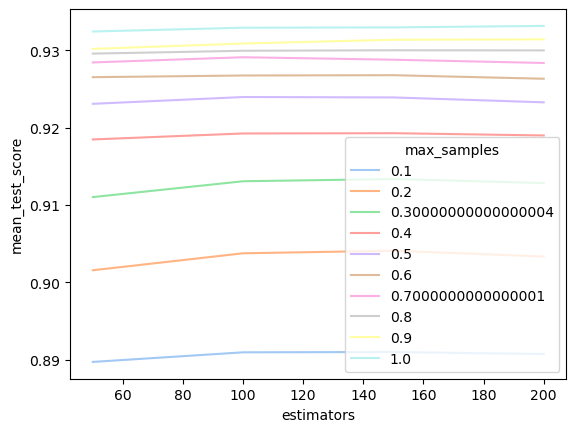

In [10]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
max_samples_list = list(grid_search_cv.cv_results_['param_max_samples'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
bagging_df = pd.DataFrame(list(zip(estimators_list, max_samples_list, mean_test_score_list)), columns=['estimators', 'max_samples', 'mean_test_score'])
sns.lineplot(data=bagging_df, x="estimators", y="mean_test_score", hue='max_samples', legend="full", palette="pastel")

## Búsqueda del modelo de random forest

In [11]:
param_grid = {
    'n_estimators': list(range(10,301,10))
}

grid_search_cv = GridSearchCV(
    RandomForestClassifier(criterion=decision_tree_model.criterion, max_depth=decision_tree_model.max_depth, max_features='sqrt', max_samples=0.6,
                           min_samples_leaf=decision_tree_model.min_samples_leaf, min_samples_split=decision_tree_model.min_samples_split,
                           random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=RandomForestClassifier(max_depth=10, max_features='sqrt',
                                              max_samples=0.6,
                                              min_samples_leaf=45,
                                              min_samples_split=200,
                                              random_state=99),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300]},
             scoring='roc_auc')

Decidimos que el número de árboles a usar será: **10** ya que la mejora desde 10 a 80 es insignificativa, se pasa de 92.38% a 92.72%

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

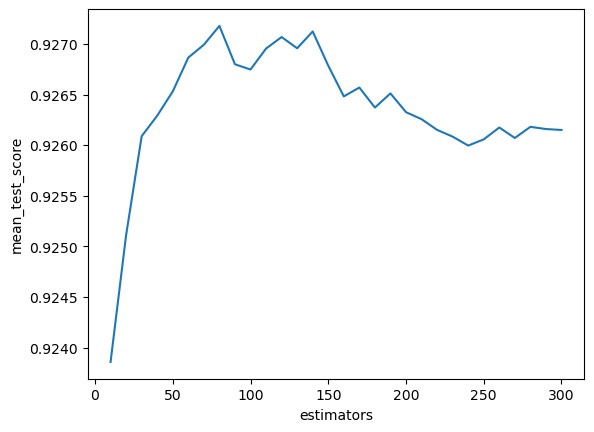

In [12]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
bagging_df = pd.DataFrame(list(zip(estimators_list, mean_test_score_list)), columns=['estimators', 'mean_test_score'])
bagging_df['mean_test_score_shift'] = bagging_df['mean_test_score'].shift().fillna(0)
bagging_df['diff'] = (bagging_df['mean_test_score'] - bagging_df['mean_test_score_shift'])
sns.lineplot(data=bagging_df, x="estimators", y="mean_test_score")

In [13]:
bagging_df

,estimators,mean_test_score,mean_test_score_shift,diff
0,10,0.923858,0.000000,0.923858
1,20,0.925112,0.923858,0.001253
2,30,0.926088,0.925112,0.000976
3,40,0.926291,0.926088,0.000203
4,50,0.926531,0.926291,0.000240
5,60,0.926865,0.926531,0.000334
6,70,0.926992,0.926865,0.000127
7,80,0.927177,0.926992,0.000186
8,90,0.926798,0.927177,-0.000379
9,100,0.926747,0.926798,-0.000052


**Modelo de random forest**

Confusion matrix, without normalization
[[733 239]
 [ 13  37]]


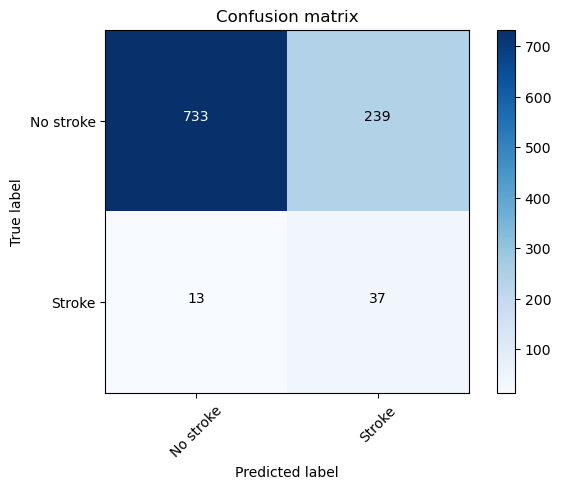

In [24]:
random_forest_model = RandomForestClassifier(
    criterion=decision_tree_model.criterion, max_depth=decision_tree_model.max_depth, max_features='sqrt',
    max_samples=0.6, n_estimators=10, min_samples_leaf=decision_tree_model.min_samples_leaf,
    min_samples_split=decision_tree_model.min_samples_split, random_state=99
)

random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

cm = utils.get_confusion_matrix(y_test, y_pred)
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.13      0.74      0.23        50

    accuracy                           0.75      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.75      0.82      1022



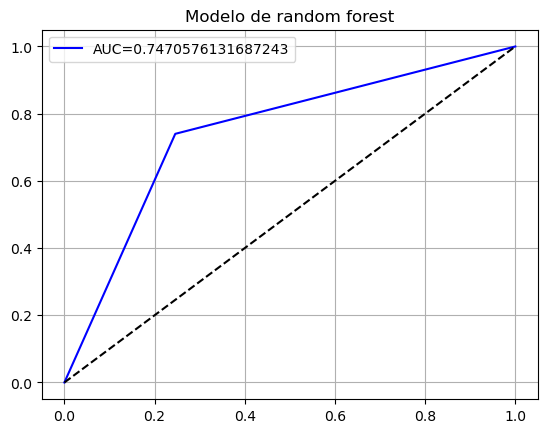

In [25]:
utils.print_metrics(y_test, y_pred, "Modelo de random forest")

## Importancia de las variables

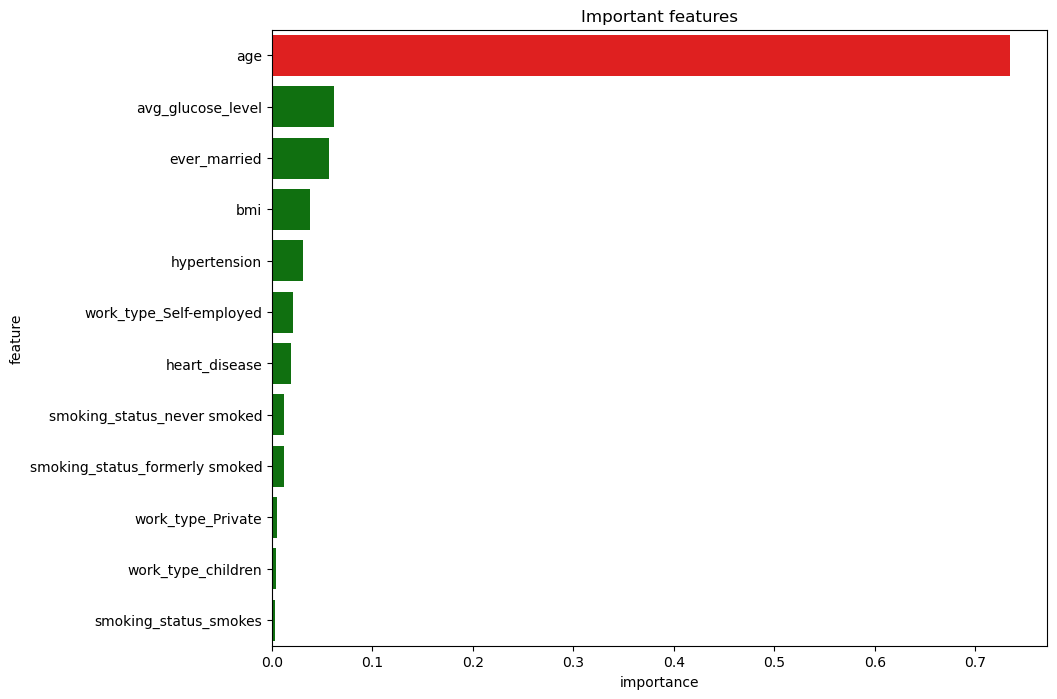

In [26]:
utils.plot_tree_feature_importance(random_forest_model.feature_names_in_, random_forest_model.feature_importances_)

**Guardamos el modelo para la comparativa final**

In [27]:
pickle.dump(random_forest_model, open("random_forest_model.sav", 'wb'))